In [81]:
#####Load the modules######
import numpy as np
import collections
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
import scipy.stats as scsi

import sklearn.metrics as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [82]:
#####Load the train and test data############
train = pd.read_excel(r'',sheet_name="train")
test = pd.read_excel(r'',sheet_name="test")

In [84]:
train.shape
test.shape

(983, 27)

In [86]:
train.head()

,friendlyName,Anergic.Activated.T.cells,Anti.inflammation,B.cells,Cell.Cycle,Dendritic,gd.T.cells,Granulocyte,IFN,IL1.Pathway,...,Monocyte,Neutrophil,NK,Oxidative.Phosphorylation,pDC,Plasma.Cells,SNOR.LOW.Up,T.Cells,TNF_Waddel.Up,Unfolded.Protein
0,AA_SLE_0007_10,-0.351604,-0.780182,0.423289,-0.594822,0.346168,0.038176,-0.436436,-0.902906,-0.209529,...,-0.501936,-0.660718,-0.203319,-0.009198,-0.336678,-0.571264,-0.184638,0.145075,-0.275913,-0.555786
1,AA_SLE_0014_12,0.250163,0.774139,-0.747907,0.209376,-0.163150,-0.287130,0.584124,0.209714,0.021004,...,0.232801,-0.072459,-0.454120,-0.485429,0.062921,0.312000,0.211678,-0.206751,-0.096287,-0.162898
2,AA_SLE_0015_10,0.169385,0.611799,0.728811,0.167905,0.264548,0.768575,0.249515,0.735258,0.430598,...,0.294048,0.599290,-0.629835,0.350133,0.158365,0.732184,0.679285,0.420457,0.275771,0.446571
3,AA_SLE_0032_14,0.130895,0.494730,0.214920,-0.583150,-0.155241,0.535420,-0.522016,0.130551,0.039225,...,0.078093,0.014083,0.812106,0.433985,0.615454,-0.563010,0.500114,0.547996,-0.012801,-0.034659
4,AA_SLE_0033_11,-0.131312,-0.606384,-0.239488,-0.051497,-0.117227,-0.496044,-0.434964,-0.023725,-0.470050,...,0.070315,0.007116,-0.629424,-0.324011,-0.218916,-0.412925,-0.432308,-0.709723,-0.156916,-0.590603


In [87]:
##### remove any columns that has text or  character data types####
x = train.iloc[:,1:28]
y = test.iloc[:,1:28]

In [88]:
y.head()

,Anergic.Activated.T.cells,Anti.inflammation,B.cells,Cell.Cycle,Dendritic,gd.T.cells,Granulocyte,IFN,IL1.Pathway,IL23.Complex,...,Monocyte,Neutrophil,NK,Oxidative.Phosphorylation,pDC,Plasma.Cells,SNOR.LOW.Up,T.Cells,TNF_Waddel.Up,Unfolded.Protein
0,0.554083,0.795014,-0.241300,0.023168,-0.103771,0.342028,-0.310574,0.728808,0.262036,0.052648,...,0.254715,0.503291,0.400074,0.365184,0.636732,0.560844,0.464227,0.502230,-0.049138,0.494506
1,0.394448,-0.625567,-0.334157,0.145732,0.094833,0.239031,-0.446984,-0.459843,0.180680,-0.042174,...,-0.159154,-0.538819,0.159653,0.102892,0.315999,0.295749,-0.334058,0.464528,-0.071254,0.339826
2,0.229075,-0.545513,0.393957,-0.415031,0.049205,0.561204,0.144303,-0.779802,0.100023,-0.592735,...,0.101510,-0.551505,0.258080,-0.053886,0.408844,0.020509,-0.590278,-0.336544,-0.213525,0.204973
3,0.344524,0.032984,0.577899,0.545068,-0.189439,0.763759,-0.365657,0.076932,-0.070750,0.146080,...,-0.173075,-0.060680,0.155800,0.213670,0.020023,0.310606,-0.625657,0.493394,-0.057499,0.048302
4,0.479487,-0.131006,-0.449815,-0.215039,0.489885,-0.066493,0.299402,-0.644685,0.081717,0.523890,...,0.072587,-0.228160,0.632900,0.280181,-0.615759,-0.519070,0.091042,0.359690,-0.107162,0.092810


In [ ]:
#### Elbow Method along with derivation of optimal number of clusters (k) quantitatively############
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15),timings=False)

visualizer.fit(y)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
visualizer.elbow_value_ 

In [93]:
###### Build the KMeans model #######
kmeans = KMeans(n_clusters=5,random_state=42,init='k-means++', n_init=5000, max_iter=300)
kmeans.fit(y)

KMeans(n_clusters=5, n_init=5000, random_state=42)

In [94]:
kmeans.cluster_centers_

array([[ 1.18291276e-01,  1.19090533e-02,  1.13924727e-01,
        -2.64212766e-01,  1.51616689e-01,  1.06257635e-01,
        -1.18975100e-01,  6.83926344e-02, -4.21700794e-02,
         1.13897826e-01,  3.06089776e-01,  4.80750940e-02,
         1.33991922e-01,  6.08317321e-02, -3.07534262e-01,
         3.39569306e-01,  2.74024507e-02, -5.03474422e-02,
         1.01422459e-01,  6.50067824e-02,  1.49519288e-01,
        -9.89770744e-02,  1.71226772e-01,  1.68918572e-01,
         1.96464558e-02, -4.44595835e-02],
       [ 2.19060823e-01, -4.79231180e-01,  1.36663674e-01,
        -2.79164365e-01,  1.21244383e-01,  3.59743365e-01,
        -4.22943161e-01, -5.09145096e-01, -2.21890080e-01,
         2.54420476e-01, -3.16197624e-01, -3.61944207e-01,
        -2.87087535e-01, -3.45220227e-01, -3.49874742e-01,
         1.57677238e-01, -2.69324427e-01, -3.66334415e-01,
         2.26978058e-01,  1.90995549e-01, -3.68751503e-02,
        -1.74421920e-01, -3.75391543e-01,  3.51650212e-01,
        -1.89

In [73]:
###### Save the model as pickle file #######
import pickle
pickle.dump(kmeans, open("kmeans8.pkl", "wb"))

In [95]:
cluster_map = pd.DataFrame()
cluster_map['friendlyName'] = test.iloc[:, 0]
cluster_map['cluster'] = kmeans.labels_

In [96]:
cluster_map

,friendlyName,cluster
0,ASLE_358_ EA,4
1,ASLE_359_ EA,1
2,ASLE_360_ EA,1
3,ASLE_361_ AS,4
4,ASLE_362_ EA,0
...,...,...
978,T0_9411_17,4
979,T0_9414_8,1
980,T0_9417_14,0
981,T0_9420_16,1


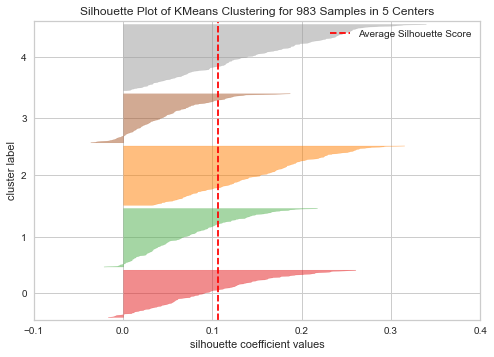

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 983 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
# Instantiate the clustering model and visualizer toi visualize 
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(y)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

IndexError: index 2 is out of bounds for axis 0 with size 2

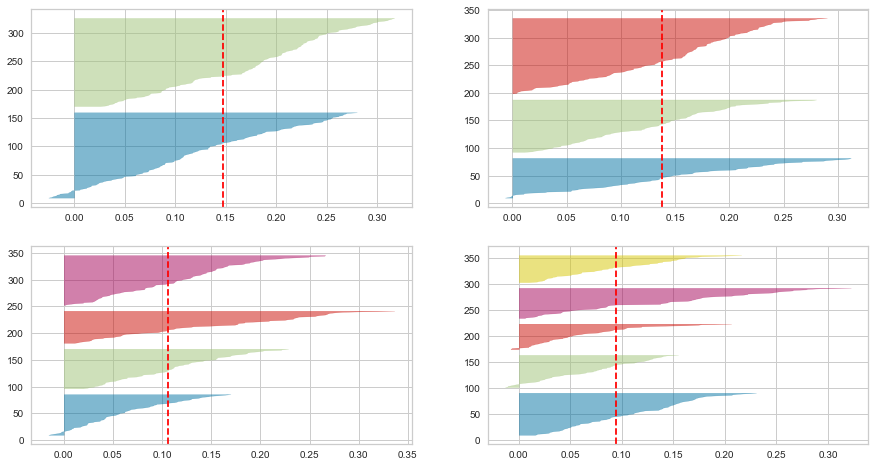

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3, 4, 5, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42,init='k-means++', n_init=5000, max_iter=300)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

In [68]:
###### Apply the  model on test data unseen data ####
test_labels = kmeans.predict(y)
#test_labels

In [78]:
test_labels_df = pd.DataFrame()
test_labels_df['friendlyName'] = test.iloc[:, 0]
test_labels_df['cluster'] = kmeans.predict(y)

In [80]:
test_labels_df.to_excel(r'test_using_kmeans.xlsx')